In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                23050     
                                                                 
Total params: 23,466
Trainable params: 23,466
Non-trainable params: 0
_________________________________________________________________


In [3]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 12s 6ms/step - loss: 3.8008 - accuracy: 0.8192
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2513 - accuracy: 0.9553
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1146 - accuracy: 0.9727
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0717 - accuracy: 0.9808
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0547 - accuracy: 0.9848
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0384 - accuracy: 0.9892
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0293 - accuracy: 0.9912
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0238 - accuracy: 0.9926
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0201 - accuracy: 0.9942
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0164 - accuracy: 0.994

In [5]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1200 - accuracy: 0.9814
0.9814000129699707


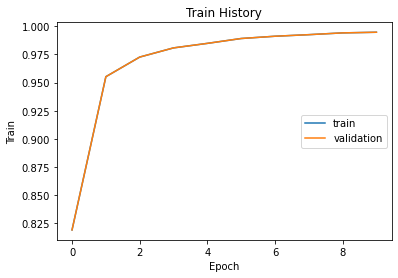

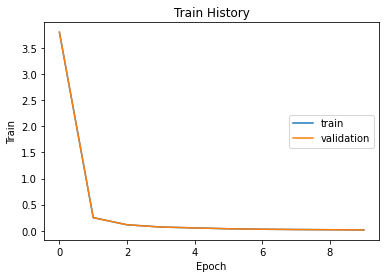

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,2,0,1,0,1,1,1,0
1,1,1119,4,2,2,0,1,1,5,0
2,2,3,1012,5,3,0,1,3,3,0
3,0,0,3,1001,0,2,0,1,1,2
4,0,0,1,0,971,0,2,1,1,6
5,4,0,0,8,0,873,2,0,3,2
6,9,1,0,0,6,5,935,0,2,0
7,1,2,9,3,7,0,0,1001,1,4
8,7,0,4,4,0,1,2,2,950,4


In [6]:
#繪製正確性與損失立歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])